# Outlier Detection using Isolation Forest for Categorical data

In [28]:
import pandas as pd
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Mushroom Classification dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data"
columns = ["class", "cap-shape", "cap-surface", "cap-color", "bruises", "odor", 
           "gill-attachment", "gill-spacing", "gill-size", "gill-color", 
           "stalk-shape", "stalk-root", "stalk-surface-above-ring", 
           "stalk-surface-below-ring", "stalk-color-above-ring", 
           "stalk-color-below-ring", "veil-type", "veil-color", "ring-number", 
           "ring-type", "spore-print-color", "population", "habitat"]
data = pd.read_csv(url, header=None, names=columns)

# Encode categorical variables
label_encoders = {}
for column in data.columns:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

# Separate features and target
X = data.drop('class', axis=1)
y = data['class']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Isolation Forest
isolation_forest = IsolationForest(contamination=0.1, random_state=42)
isolation_forest.fit(X_train)

# Obtain the decision function score for all instances
decision_scores = isolation_forest.decision_function(X_test)

# Predict outliers
predictions = isolation_forest.predict(X_test)

In [22]:
# -1 indicates an outlier, 1 indicates normal data point
outlier_indices = X_test[predictions == -1].index

# Print the outlier indices
print("Outlier indices:")
print(outlier_indices)

Outlier indices:
Index([ 736, 7019, 7528, 7460, 7811, 7221, 5586,  472, 5687, 1740,
       ...
       8055, 7323, 5836, 7678, 7235, 7612, 7944, 7636,  626, 5939],
      dtype='int64', length=147)


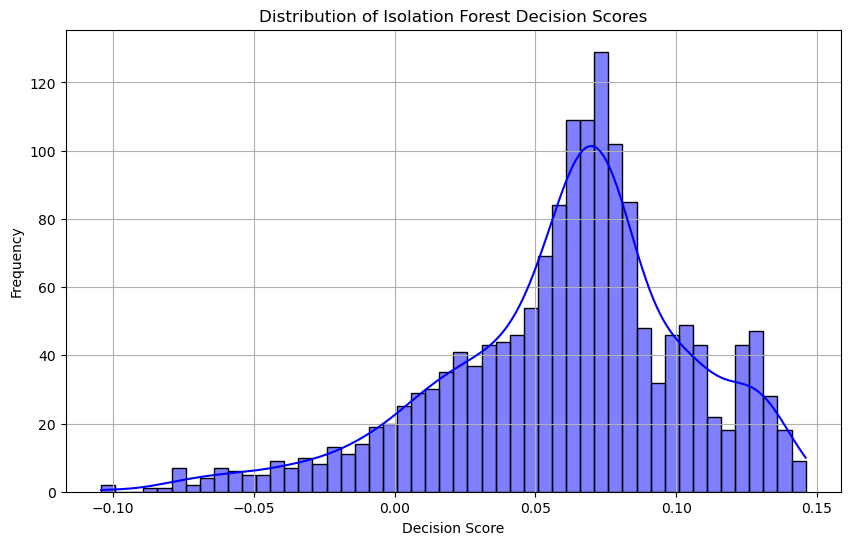

In [31]:
plt.figure(figsize=(10, 6))
sns.histplot(decision_scores, bins=50, kde=True, color='blue')
plt.title('Distribution of Isolation Forest Decision Scores')
plt.xlabel('Decision Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

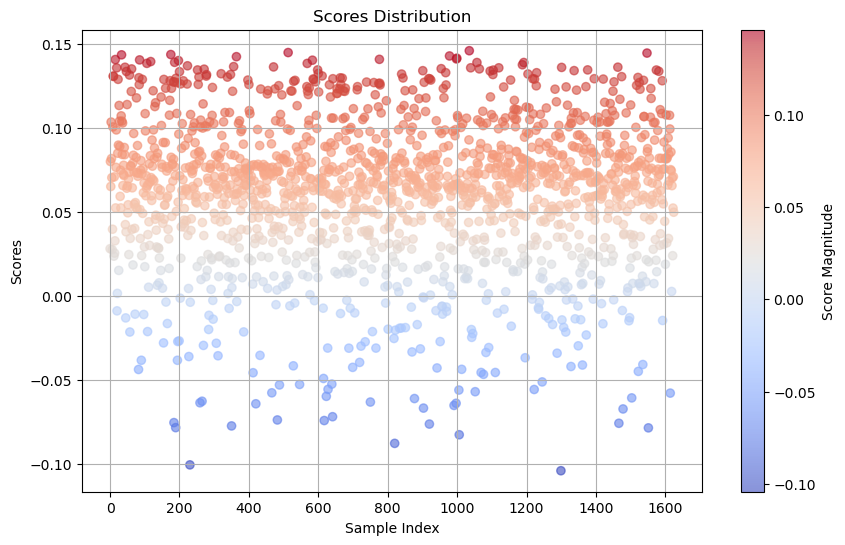

In [24]:
# Plot the scores with a gradient colormap
plt.figure(figsize=(10, 6))
plt.scatter(range(len(decision_scores)), decision_scores, c=decision_scores, cmap='coolwarm', alpha=0.6)
plt.colorbar(label='Score Magnitude')
plt.xlabel('Sample Index')
plt.ylabel('Scores')
plt.title('Scores Distribution')
plt.grid(True)
plt.show()

In [25]:
from sklearn.metrics import confusion_matrix, f1_score

y_true = y_test.replace({'e': 0, 'p': 1})
y_pred = [1 if x == 1 else 0 for x in predictions]
cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[130 713]
 [ 17 765]]


In [26]:
f1 = f1_score(y_true, y_pred)
print("F1 Score:", f1)

F1 Score: 0.6769911504424779
